In [1]:
import rlssm
import pandas as pd
import os

In [3]:
def f(x):
    return x

In [4]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)
data = data[data.participant < 4].reset_index(drop=True)

data['block_label'] += 1

data['S_cor'] = f(data['f_cor'].values)
data['S_inc'] = f(data['f_inc'].values)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,S_cor,S_inc
0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0,43.0,39.0
1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0,60.0,50.0
2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0,44.0,36.0
3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0,55.0,55.0
4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0,52.0,49.0


In [5]:
model = rlssm.ALBAModel_2A(1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_69427f5464eb2fc188bfd9fcea2e563b NOW.
INFO:pystan:OS: darwin, Python: 3.7.9 (default, Aug 31 2020, 07:22:35) 
[Clang 10.0.0 ], Cython 0.29.21


Compiling /var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T/tmpdbmbv7mp/stanfit4anon_model_69427f5464eb2fc188bfd9fcea2e563b_987350642548915098.pyx because it changed.
[1/1] Cythonizing /var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T/tmpdbmbv7mp/stanfit4anon_model_69427f5464eb2fc188bfd9fcea2e563b_987350642548915098.pyx
building 'stanfit4anon_model_69427f5464eb2fc188bfd9fcea2e563b_987350642548915098' extension
creating /var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T/tmpdbmbv7mp/var
creating /var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T/tmpdbmbv7mp/var/folders
creating /var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T/tmpdbmbv7mp/var/folders/zy
creating /var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T/tmpdbmbv7mp/var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp
creating /var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T/tmpdbmbv7mp/var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T
creating /var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000gp/T/tmpdbmbv7mp/var/folders/zy/hm8tbx3j7jn6skbfk75x0ll00000

LinkError: command 'x86_64-apple-darwin13.4.0-clang++' failed with exit status 1

In [5]:
# sampling parameters
n_iter = 700
n_chains = 2
n_thin = 5

In [6]:
model_fit = model.fit(data,
                    thin = n_thin,
                    iter = n_iter,
                    chains = n_chains)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
16.0 of 140 iterations ended with a divergence (11.428571428571429%)
  Try running with larger adapt_delta to remove the divergences
6 of 140 iterations saturated the maximum tree depth of 10 (4.285714285714286%)
Run again with max_depth set to a larger value to avoid saturation
Chain 1: E-BFMI = 0.05595253818325452
  E-BFMI below 0.2 indicates you may need to reparameterize your model


In [7]:
model_fit.rhat.describe()

,rhat
count,6.000000
mean,2.082797
std,0.536378
min,1.317865
25%,1.731858
50%,2.234719
75%,2.331277
max,2.781781


In [8]:
model_fit.rhat.head()

,rhat,variable
0,1.592140,k
1,1.317865,A
2,2.151010,tau
3,2.335561,v0
4,2.781781,ws


In [9]:
model_fit.waic

{'lppd': -713.409940380724,
 'p_waic': 72143.76196442061,
 'waic': 145714.34380960267,
 'waic_se': 456.6106300253051}

### Posteriors

In [10]:
model_fit.samples

,chain,draw,transf_k,transf_A,transf_tau,transf_v0,transf_ws,transf_wd
0,0,11,3.439463,1.768580,0.166441,2.240498,0.010908,0.044275
1,0,69,2.371216,1.942588,0.339697,2.369782,0.006752,0.038272
2,0,51,3.401261,1.494359,0.178384,2.094716,0.011546,0.031092
3,0,50,3.885847,1.576500,0.110763,2.899971,0.005471,0.044274
4,0,23,3.502185,1.770572,0.163297,2.364724,0.010324,0.041937
...,...,...,...,...,...,...,...,...
135,1,32,1.443901,1.531851,0.721752,8.148716,2.329104,5.957971
136,1,26,1.089834,1.077246,0.723479,5.164583,2.127443,6.219576
137,1,33,1.608111,0.951355,0.725026,11.437288,3.397031,5.774853
138,1,40,1.174408,6.283967,0.709612,5.250204,0.000255,0.086894


In [11]:
model_fit.trial_samples

OrderedDict([('k_t',
              array([[3.43946273, 3.43946273, 3.43946273, ..., 3.43946273, 3.43946273,
                      3.43946273],
                     [2.37121553, 2.37121553, 2.37121553, ..., 2.37121553, 2.37121553,
                      2.37121553],
                     [3.40126085, 3.40126085, 3.40126085, ..., 3.40126085, 3.40126085,
                      3.40126085],
                     ...,
                     [1.60811102, 1.60811102, 1.60811102, ..., 1.60811102, 1.60811102,
                      1.60811102],
                     [1.1744078 , 1.1744078 , 1.1744078 , ..., 1.1744078 , 1.1744078 ,
                      1.1744078 ],
                     [2.90741241, 2.90741241, 2.90741241, ..., 2.90741241, 2.90741241,
                      2.90741241]])),
             ('A_t',
              array([[1.76857965, 1.76857965, 1.76857965, ..., 1.76857965, 1.76857965,
                      1.76857965],
                     [1.94258788, 1.94258788, 1.94258788, ..., 1.94258788, 

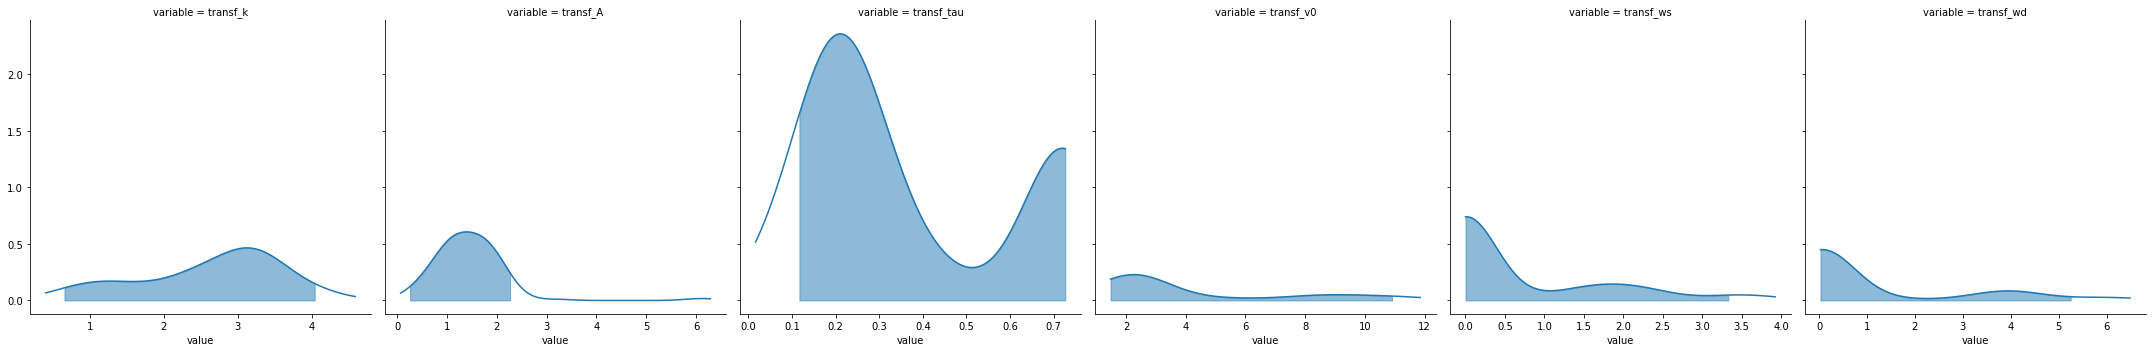

In [12]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

In [13]:
pp_rt, pp_acc = model_fit.get_posterior_predictives(n_posterior_predictives=100)

In [14]:
pp_rt

array([[1.08219003, 1.07734941, 1.13200406, ..., 1.12135476, 1.0959723 ,
        1.56699627],
       [1.23827036, 1.70853781, 1.01761332, ..., 1.02693579, 1.25008666,
        1.7023603 ],
       [1.26686898, 1.51352905, 1.4063798 , ..., 1.4945944 , 1.09914665,
        1.21147519],
       ...,
       [0.73177931, 0.72891351, 0.73157837, ..., 0.7302144 , 0.72934249,
        0.72879789],
       [1.23250421, 1.20326431, 1.25127064, ..., 1.07215756, 1.65715766,
        1.38240776],
       [1.03843332, 1.19714182, 0.98279278, ..., 1.63020437, 1.16658523,
        1.23404482]])

In [15]:
pp_acc

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [16]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.678720,1.312660,5.332706,1.015079,1.168945,1.302301,1.445678,1.696513,0.948458,1.094496,1.247343,1.401123,1.701248
2,0.662031,1.296965,2.348485,0.989010,1.120128,1.257763,1.392898,1.664433,0.955194,1.088370,1.221435,1.368740,1.691166
3,0.653686,1.324243,1.181960,1.011896,1.194082,1.305881,1.441265,1.749829,0.979149,1.138205,1.259054,1.410988,1.719769
4,0.682893,1.289680,1.049611,1.018312,1.161074,1.297706,1.431849,1.725084,0.962127,1.089960,1.212444,1.372317,1.619924
5,0.692629,1.310222,2.401445,0.979163,1.145529,1.281138,1.397081,1.714048,0.952279,1.130749,1.240769,1.398436,1.693825
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.689847,1.310640,1.701160,1.008797,1.158082,1.271471,1.438872,1.782482,0.967013,1.097195,1.231184,1.387852,1.671561
97,0.656467,0.731160,0.619536,0.729107,0.730098,0.731125,0.732072,0.733886,0.728360,0.729491,0.730931,0.732171,0.734076
98,0.840056,0.730432,0.823316,0.729303,0.730281,0.731506,0.732670,0.733936,0.728056,0.728908,0.729715,0.730996,0.733260


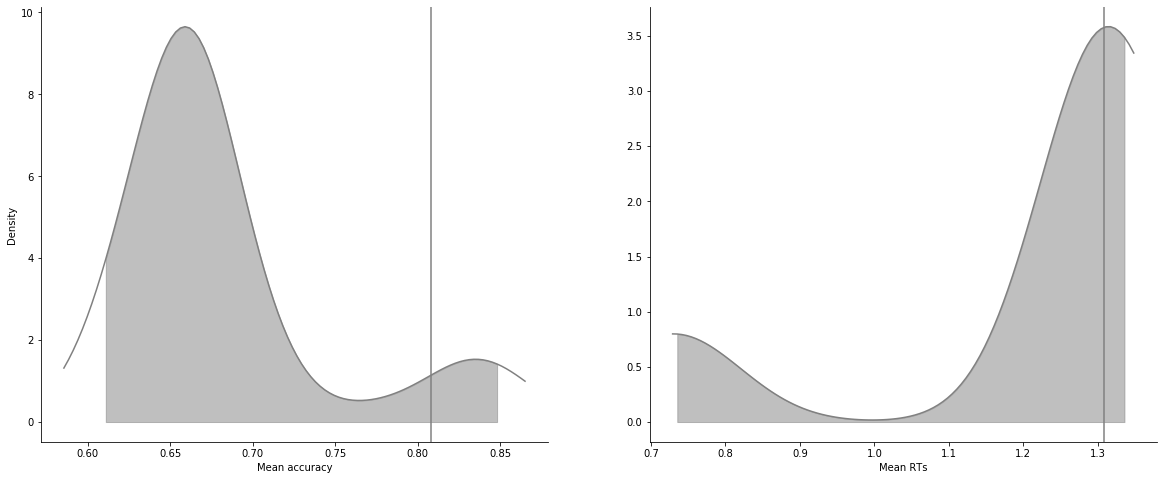

In [17]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

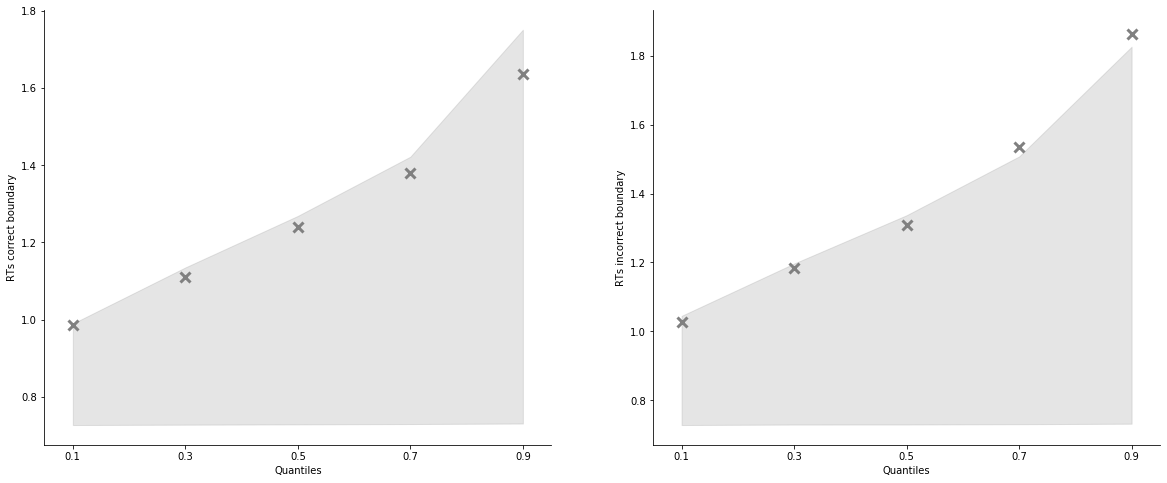

In [18]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

In [19]:
import numpy as np

In [20]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [21]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,S_cor,S_inc,accuracy_rescale,choice_pair,block_bins
0,0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0,43.0,39.0,2,AB,1
1,1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0,60.0,50.0,1,CD,1
2,2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0,44.0,36.0,2,BD,1
3,3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0,55.0,55.0,2,CD,1
4,4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0,52.0,49.0,1,CD,1


In [22]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1.0         AB          1            0.694915  1.391804  0.752668   
                        2            0.508475  1.408464  3.438360   
                        3            0.576271  1.367223  1.291625   
                        4            0.593220  1.341534  1.452453   
                        5            0.576271  1.415912  0.827003   
...                                       ...       ...       ...   
3.0         CD          96           0.700000  1.254787  0.733045   
                        97           0.666667  0.729988 -0.044329   
                        98           0.766667  0.729507 -0.133289   
                        99           0.550000  1.249236  1.308857   
                        100          0.533333  1.287272  1.505407   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.330990             1.183769   
                        2                    1.196624             1.052700   
                        3                    1.207376             1.239631   
                        4                    1.080698             1.226635   
                        5                    1.277740             1.152302   
...                                               ...                  ...   
3.0         CD          96                   1.076603             1.160717   
                        97                   0.729547             0.728996   
                        98                   0.729346             0.728993   
                        99                   1.105409             1.077058   
                        100                  1.099497             1.076182   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.544382             1.271797   
                        2                    1.375336             1.159288   
                        3                    1.271163             1.364551   
                        4                    1.215693             1.312664   
                        5                    1.385119             1.253708   
...                                               ...                  ...   
3.0         CD          96                   1.147408             1.276568   
                        97                   0.730161             0.729831   
                        98                   0.729931             0.729576   
                        99                   1.271080             1.213814   
                        100                  1.271402             1.220407   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1.0         AB          1                    1.613481             1.422510  
                        2                    1.540191             1.381302  
                        3                    1.414820             1.447458  
                        4                    1.361498             1.478444  
                        5                    1.595730             1.476362  
...                                               ...                  ...  
3.0         CD          96                   1.303112             1.366496  
                        97                   0.730969             0.730764  
                        98                   0.730376             0.729756  
                        99                   1.368468             1.283030  
                        100                  1.424711             1.396624  

[1200 rows x 9 columns]

In [23]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.711111  1.329607  1.917104               1.204122   
           2            0.577778  1.373249  0.843005               1.153107   
           3            0.622222  1.336002  1.110816               1.175664   
           4            0.622222  1.335371  1.724462               1.251985   
           5            0.655556  1.359607  1.155517               1.126875   
...                          ...       ...       ...                    ...   
8          96           0.629213  1.276164  2.209072               1.157601   
           97           0.674157  0.731055  1.088721               0.730260   
           98           0.831461  0.730567  0.822404               0.731346   
           99           0.752809  1.347551  1.194279               1.180723   
           100          0.674157  1.289410  0.809901               1.161913   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.148433               1.281992   
           2                  1.113925               1.325622   
           3                  1.148256               1.372691   
           4                  1.080796               1.429428   
           5                  1.162695               1.326859   
...                                ...                    ...   
8          96                 1.098297               1.288112   
           97                 0.729678               0.730887   
           98                 0.729182               0.732004   
           99                 1.147064               1.335062   
           100                1.075196               1.314609   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.241262               1.514751   
           2                  1.286283               1.507662   
           3                  1.227145               1.474131   
           4                  1.200703               1.608930   
           5                  1.304382               1.521795   
...                                ...                    ...   
8          96                 1.181555               1.435050   
           97                 0.730192               0.731666   
           98                 0.730160               0.733424   
           99                 1.243751               1.676498   
           100                1.184201               1.508138   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.366406  
           2                  1.510322  
           3                  1.414078  
           4                  1.328291  
           5                  1.448415  
...                                ...  
8          96                 1.239506  
           97                 0.731899  
           98                 0.730783  
           99                 1.408976  
           100                1.338526  

[800 rows x 9 columns]

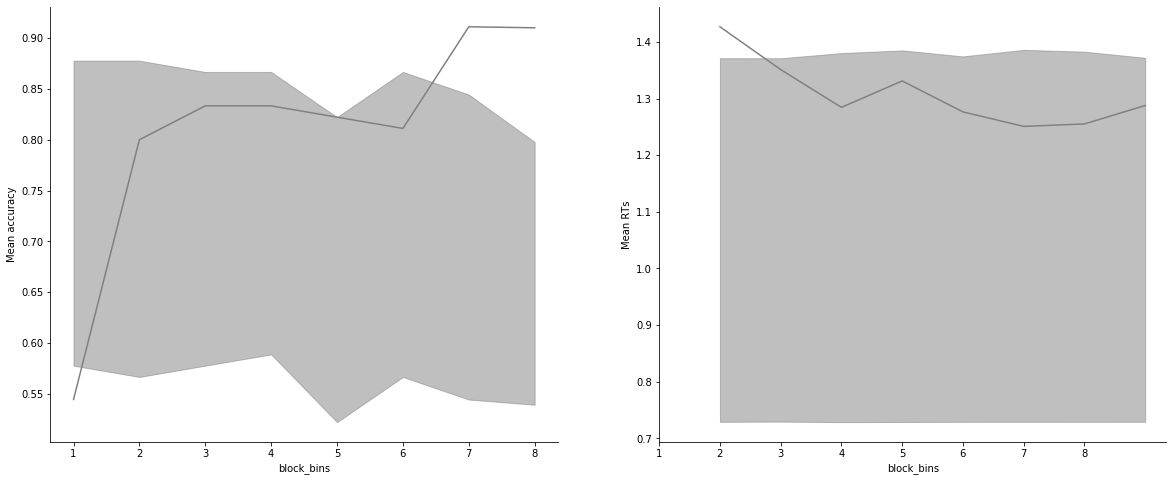

In [24]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

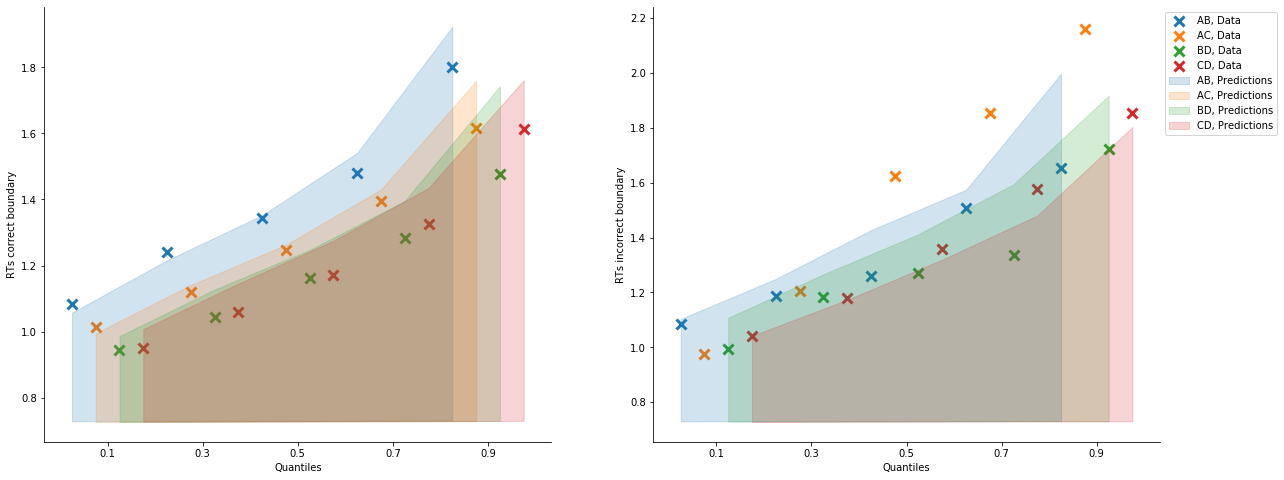

In [25]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);

In [26]:
sv = model_fit.last_values
sv

,chain,draw,warmup,A,k,tau,v0,wd,ws
69,0,69,0,1.787882,2.273198,-0.905050,2.271617,-3.243829,-4.994589
139,1,69,0,1.425895,2.977725,-1.490763,2.279777,-3.311904,-4.964643
